# Executive Summary
## Analysis of Differential Gene Expression in Knock-down Models

The objective of this project is to analyze differential gene expression following knockdown of BRM and BRG1 in liver cancer cell lines. The project encompasses differential gene expression analysis, validation of knock-down efficiency, clustering of differentially repressed genes, and Gene Ontology (GO) analysis to elucidate the biological impact of BRG1 and BRM depletion.<br><br>

**Key Findings**

1. **Differential Gene Expression Analysis:**

    - Differential gene expression analysis was performed to identify genes significantly dysregulated by BRM and BRG1 knockdown.
    - The analysis revealed significant alterations in the expression levels of numerous genes, underscoring widespread regulatory roles of BRG1 and BRM.<br><br>

2. **Confirmed BRM and BRG1 Knockdowns:**
    - The efficiency of BRM and BRG1 knockdowns was confirmed in all samples.
    - This validation confirmed that the observed gene expression changes were directly attributable to the depletion of BRG1 and BRM, rather than off-target effects or technical variability.<br><br>

3. **Cluster Analysis:**
    - Clustering of differentially repressed genes was performed to group genes with similar expression patterns.
    - Four distinct clusters were identified, each representing a unique set of biological processes and pathways affected by the knock-downs.<br><br>

4. **GO Analysis:**
    - GO analyses were conducted to identify enriched biological processes within each gene cluster.
    - The analyses highlighted the potential impact of BRG1 and BRM depletion on genes involved various biological processes including immune response regulation, hormonal signaling, organic acid biosynthesis, lipid homeostasis, organic anion transport, cell growth and development, and osmotic stress response.

**Conclusion**
This comprehensive analysis underscores the significant roles of BRG1 and BRM in regulating gene expression related to immune response, hormonal signaling, stress response, cell proliferation, and metabolic processes in liver cancer cells. The repression of genes involved in these critical processes highlights the potential therapeutic implications of targeting BRG1 and BRM in liver cancer treatment.

Future research should focus on further elucidating the molecular mechanisms by which BRG1- and BRM-mediated chromatin remodeling regulate these genes and exploring the therapeutic potential of modulating their activity.

## Load Required Libraries

In [1]:
install_and_load <- function(packages) {
    if (!requireNamespace("BiocManager", quietly=T)) {
    install.packages("BiocManager", quiet=T)
    }
    
    for (package in bioconda_packages) {
        if (!require(package, character.only=T)) {
            BiocManager::install(package, quiet=T, force=T)
            require(package, character.only=T)
        }
    }
    
    for (package in cran_packages) {
        if (!require(package, character.only=T)) {
            install.packages(package, quiet=T, force=T)
            require(package, character.only=T)
        }
    }
}

bioconda_packages <- c("DESeq2", "pheatmap", "clusterProfiler",
                    "WGCNA", "org.Hs.eg.db", "GEOquery")

cran_packages <- c("dplyr", "tidyverse")

suppressMessages(suppressWarnings(install_and_load(packages)))

## Load Dataset
- BRG1 and BRM are subunits of the chromatin remodeling complex SNF/SWI, which is required for transcriptional activation of genes normally repressed by chromatin.
- This dataset contains RNA-seq count data from a study monitoring the depletion of BRG1 and BRM in human liver cancer cells.
- HepG2 cells were transduced with shRNA targeting BRG1, BRM, both (double-knockdown), or neither (non-specifc).

### Feature Count Matrix

In [2]:
count_data <- read.csv("~/Downloads/GSE102560_count_matrix.csv",
                       header=T, row.names=1)

count_matrix <- as.matrix(count_data)

count_matrix

,NS_1,Brg1_1,Brm_1,Double_1,NS_2,Brg1_2,Brm_2,Double_2,NS_3,Brg1_3,Brm_3,Double_3,NS_4,Brg1_4,Double_4
A1BG,83,46,114,22,67,25,212,26,116,64,459,43,196,77,58
A1CF,2577,1016,2696,2427,1562,941,2915,1982,1187,1462,2824,1964,2310,1618,2146
A2M,61218,9569,61447,19427,31754,6895,110626,14946,52128,25272,131233,20930,100768,28420,20408
A2ML1,1,2,1,2,2,3,4,3,0,5,4,2,2,1,0
A2MP1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A4GALT,44,346,5,47,19,165,17,59,3,239,19,159,10,164,42
A4GNT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AAAS,1101,1023,680,750,639,734,1213,641,1103,1882,3096,1610,1883,1770,1572
AACS,826,667,347,262,547,483,814,184,802,778,1451,615,1476,846,481


### Sample Metadata
- Set `Non_Specific` as control group. 
- Ensured that the column names of the `count_data` matched the row names of `metadata`.

In [3]:
metadata <- read.csv("~/Downloads/GSE102560_metadata.csv",
                     header=T, row.names=1, stringsAsFactors=T)

metadata$Group <- factor(metadata$Group,
                         levels=c("Non_Specific", "BRG1", "BRM", "Double_Knockdown"))

metadata

all(colnames(count_matrix)==rownames(metadata))

,Group,Replicate
,<fct>,<int>
NS_1,Non_Specific,1
Brg1_1,BRG1,1
Brm_1,BRM,1
Double_1,Double_Knockdown,1
NS_2,Non_Specific,2
Brg1_2,BRG1,2
Brm_2,BRM,2
Double_2,Double_Knockdown,2
NS_3,Non_Specific,3


[1] TRUE

## Differential Gene Expression Analysis
- Knockdown groups were contrasted against the Non-Specific (Control) group.
- Genes with very low counts, defined as having fewer than 10 features in at least one group, were filtered out.
- In total, 2,464 genes (17%) were upregulated, while 2,248 genes (15%) were downregulated. 

In [4]:
dds <- DESeqDataSetFromMatrix(countData=count_matrix, colData=metadata, design=~Group)

dds <- DESeq(dds, quiet=T)

keep <- rowSums(counts(dds)>=10)>=min(table(metadata$Group))

dds <- dds[keep,]

summary(results(dds))


out of 14625 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2464, 17%
LFC < 0 (down)     : 2248, 15%
outliers [1]       : 5, 0.034%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### Selected Significantly Downregulated Genes
- Identified genes that were significantly downregulated by BRG1-, BRM-, or double-knockdown.
- Cut-off criteria were a greater than 4-fold downregulation and an adjusted *p-value* of less than 0.05.
- Overall, 543 genes were significantly downregulated in at least one knockdown group.

In [5]:
groups <- levels(dds@colData$Group)

all_sig_genes <- list()
for (i in 2:length(groups)) {
    res <- results(dds, contrast=c("Group", groups[i], groups[1]))
    
    sig_genes <- res[res$log2FoldChange< -2 & !is.na(res$padj) & res$padj<0.05, ]
    
    all_sig_genes[[paste(groups[i], "vs", groups[1])]] <- sig_genes
}

combined_sig_genes <- do.call(rbind, lapply(all_sig_genes,
                                            function(x) as.data.frame(x))) %>%
    rownames_to_column("rownames") %>%
    separate(rownames, c("comparison", "gene_id"), "\\.", extra="merge")
                                            
sig_genes <- unique(combined_sig_genes$gene_id)
                                            
length(sig_genes)                           

[1] 543

### Confirmed BRM and BRG1 Knockdowns
Feature counts were VST-transformed and visualized as means with standard error.

- BRG1 expression remained unaffected by BRM depletion, and conversely, BRM expression remained unaffected by BRG1 depletion.
- BRG1 expression was significantly reduced in both the shBRG1 and Double-knockdown groups.
- Similarly, BRM expression was significantly reduced in both the shBRM and Double-knockdown groups.

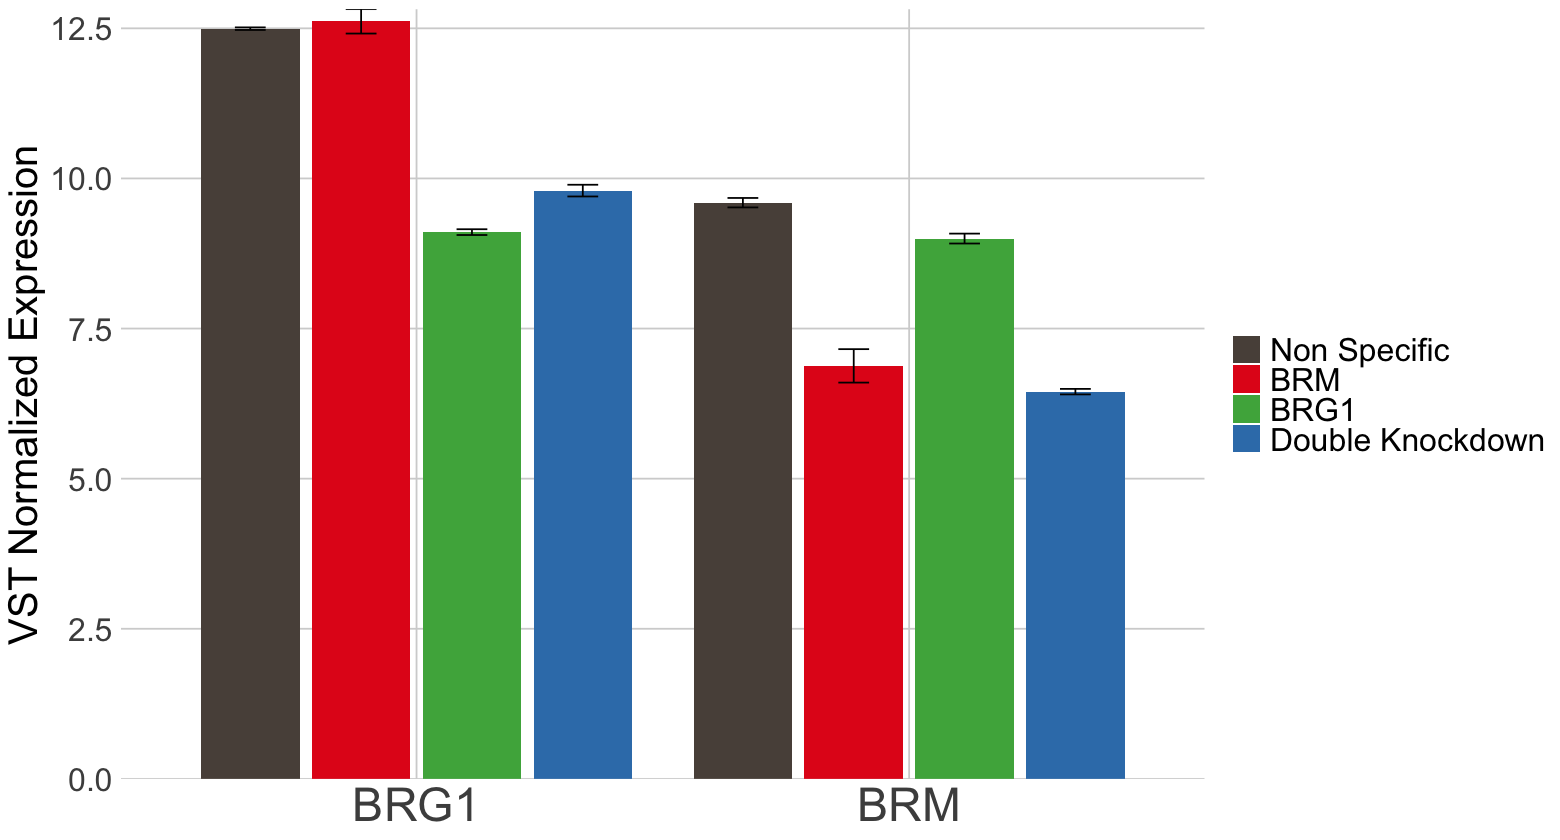

In [6]:
options(repr.plot.width=13, repr.plot.height=7)

assay(vst(dds, blind=F)) %>%
    as.data.frame() %>%
    filter(grepl("SMARCA4|SMARCA2", rownames(.))) %>%
    rownames_to_column() %>%
    gather(2:(length(rownames(metadata))+1), key="Sample",
           value="Expression") %>%
    rename("Symbol"="rowname") %>%
    mutate(Symbol=ifelse(Symbol=="SMARCA2", "BRM", "BRG1"),
           Group=gsub("_", " ", metadata[Sample, 1]),
           Group=factor(Group, levels=c("Non Specific", "BRM",
                                        "BRG1", "Double Knockdown"))) %>%
    group_by(Group, Symbol) %>%
    summarise(`VST Normalized Expression`=mean(Expression),
              SE=sd(Expression)/sqrt(n()), .groups="drop") %>%
    ggplot(aes(y=`VST Normalized Expression`, x=Symbol,
               fill=Group)) +
        geom_col(position=position_dodge(0.9), width = 0.8) +
        geom_errorbar(aes(ymin=`VST Normalized Expression`-SE,
                          ymax=`VST Normalized Expression`+SE),
                      position=position_dodge(0.9), width=0.25) +
        scale_y_continuous(expand=c(0,0)) +
        scale_fill_manual(values=c("#594F48", "#e3221cff", "#4caf4aff", "#377eb8ff"))+
        theme(axis.ticks=element_blank(), strip.background=element_blank(),
              panel.grid.major=element_line(colour="light gray"),
              panel.background=element_rect(fill="white"), text=element_text(size=24),
              axis.title.x=element_blank(), legend.title=element_blank(),
              axis.text.x=element_text(size=28))


## Cluster Analysis
- Performed unsupervised clustering of samples and genes using expression fold change relative to the Non-Specific (Control) group.
- The analysis identified distinct expression groups, indicating differential responses to BRM/BRG1 knockdown.

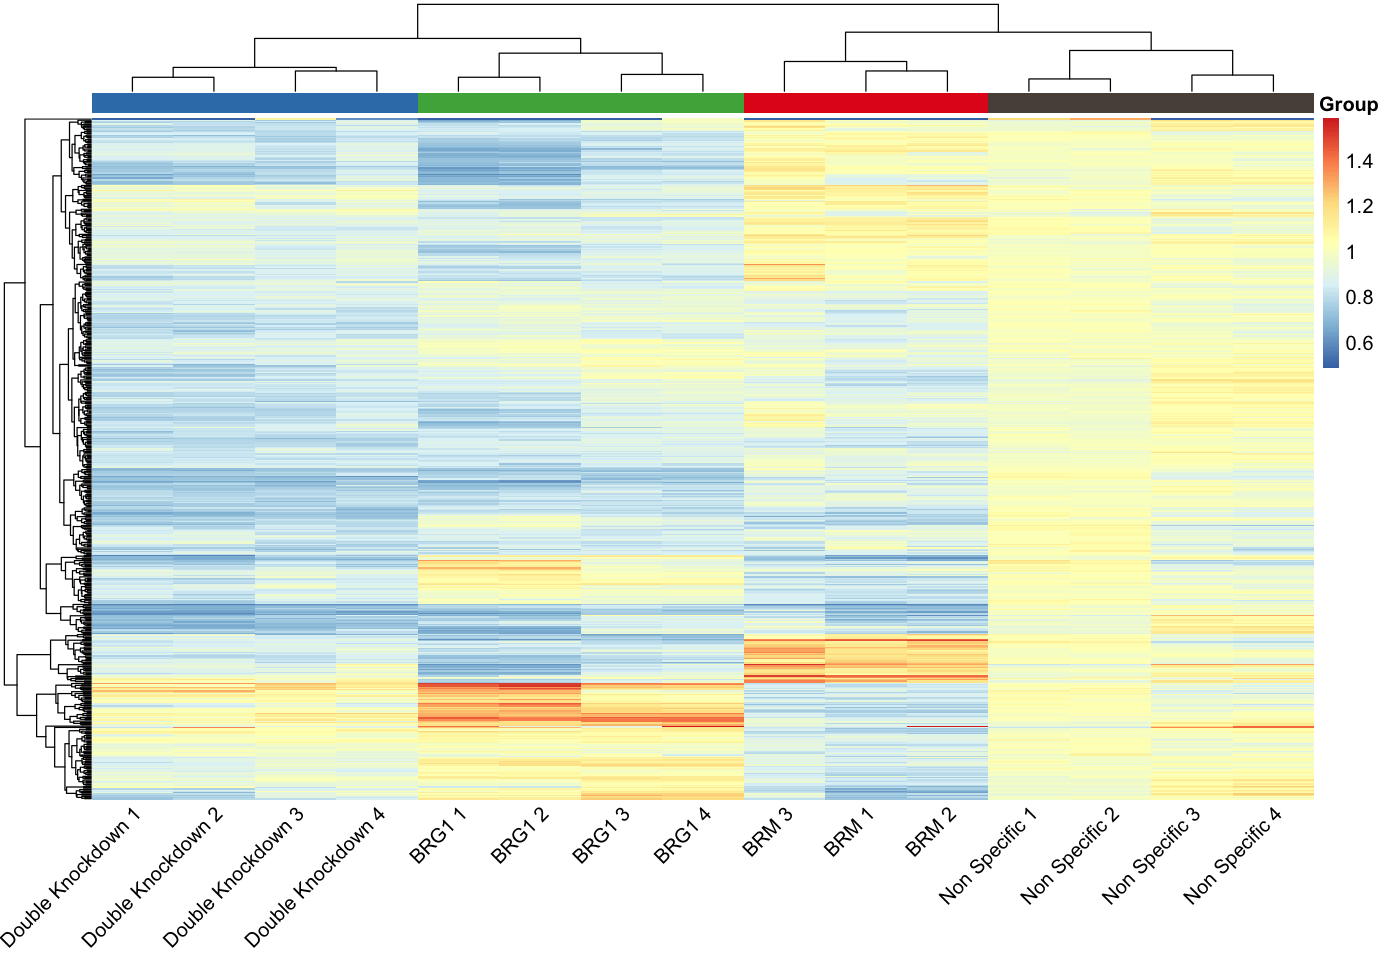

In [7]:
set.seed(1500)

normalised_data <- assay(vst(dds, blind=F))[sig_genes, ]

fold_data <- normalised_data %>%
    as.data.frame() %>%
    mutate(NS_mean=(NS_1+NS_2+NS_3)/3) %>%
    mutate(across(where(is.numeric), ~ . / NS_mean)) %>%
    select(-NS_mean)

options(repr.plot.width=11.5, repr.plot.height=8)

pheatmap(fold_data, fontsize=12, angle_col=45, show_rownames=F, annotation_legend=F, 
         annotation_col=metadata %>% select(Group),
         labels_col=gsub("_", " ", paste(metadata$Group, metadata$Replicate)),
         annotation_colors=list(Group=c("Non_Specific"="#594F48",
                                        "BRM"="#e3221cff",
                                        "BRG1"="#4caf4aff",
                                        "Double_Knockdown"="#377eb8ff"))) 

Identified four distinct clusters based on expression changes relative to the control group:

- **Cluster 1**: Expression repressed by both BRM and BRG1 depletion, and simultaneous knockdown further enhances repression.
- **Cluster 2**: Repressed by BRM depletion but double knockdown restores normal expression because BRG1 depletion induces expression.
- **Cluster 3**: Expression repressed by BRM depletion but is unaffected by BRG1 depletion.
- **Cluster 4**: Repressed by BRG1 depletion but only moderately repressed in the double-knockdown condition because BRM depletion moderately induces their expression.

clusters
  1   2   3   4 
204  44 138 157 

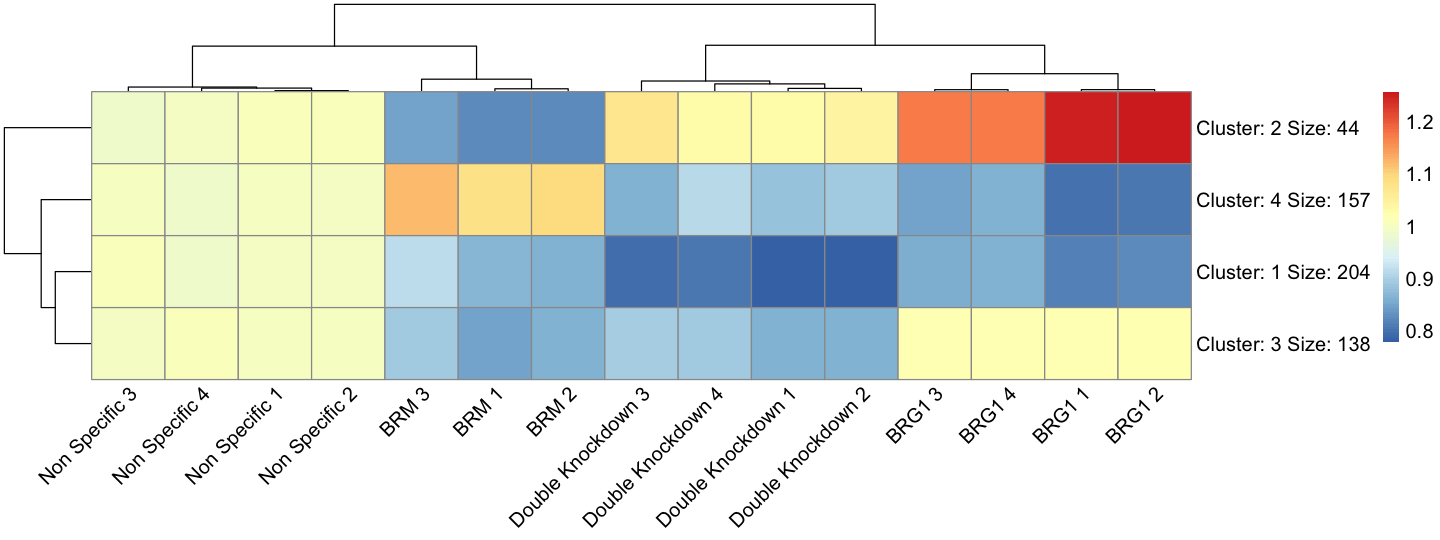

In [8]:
set.seed(1500)

options(repr.plot.width=12, repr.plot.height=4.5)

cluster_data <- pheatmap(fold_data, kmeans_k=4, fontsize=12, angle_col=45,
                labels_col=gsub("_", " ", paste(metadata$Group, metadata$Replicate)))

clusters <- cluster_data$kmeans$cluster

table(clusters)

## GO Analysis

Performed GO analysis to identify the biological processes enriched in each cluster of differentially repressed genes, highlighting the potential impact of BRG1 and BRM depletion on various cellular functions and pathways.

- **Cluster 1**: Depletion of BRG1, BRM, or both, repressed genes involved in estrogen metabolic process, adaptive immune response, and immune cell activation, potentially disrupting immune response regulation and liver cancer cell proliferation.
- **Cluster 2**: Depletion of BRM repressed genes involved in salt response processes, potentially inhibiting liver cancer cells' ability to maintain cellular integrity under osmotic stress. The restoration of expression by BRG1 depletion might mitigate off-target effects.
- **Cluster 3**: Depletion of BRM repressed genes involved in cell growth and development signaling, potentially inhibiting growth and proliferation of epithelial-like HepG2 cells.
- **Cluster 4**: Depletion of BRG1 repressed genes involved in lipid and organic acid metabolism, potentially disrupting adaptability and survival of liver cancer cells.

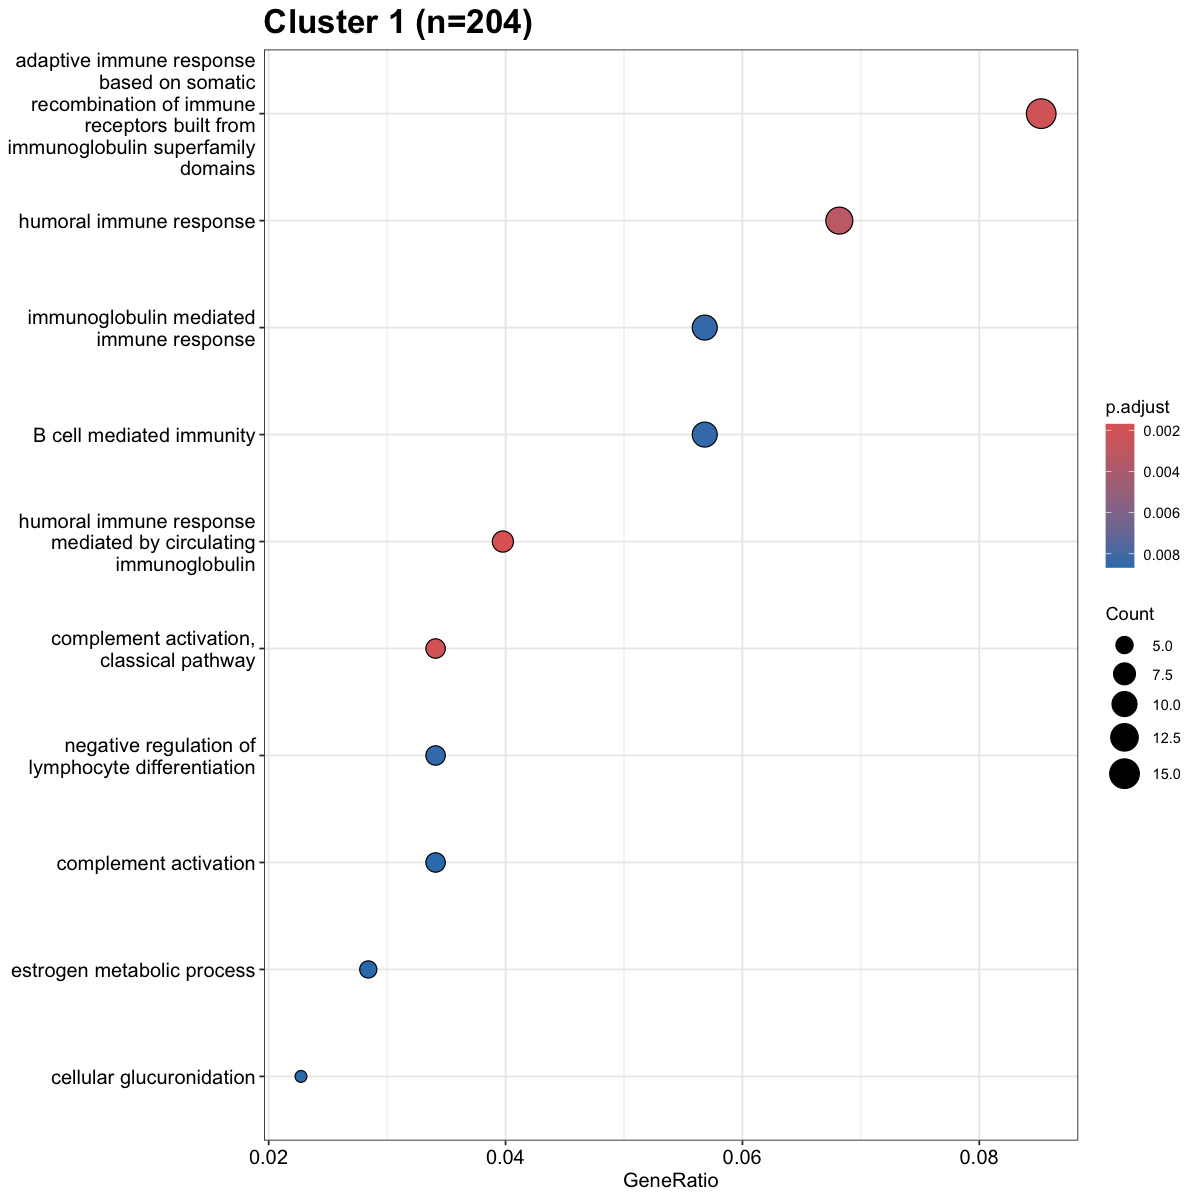

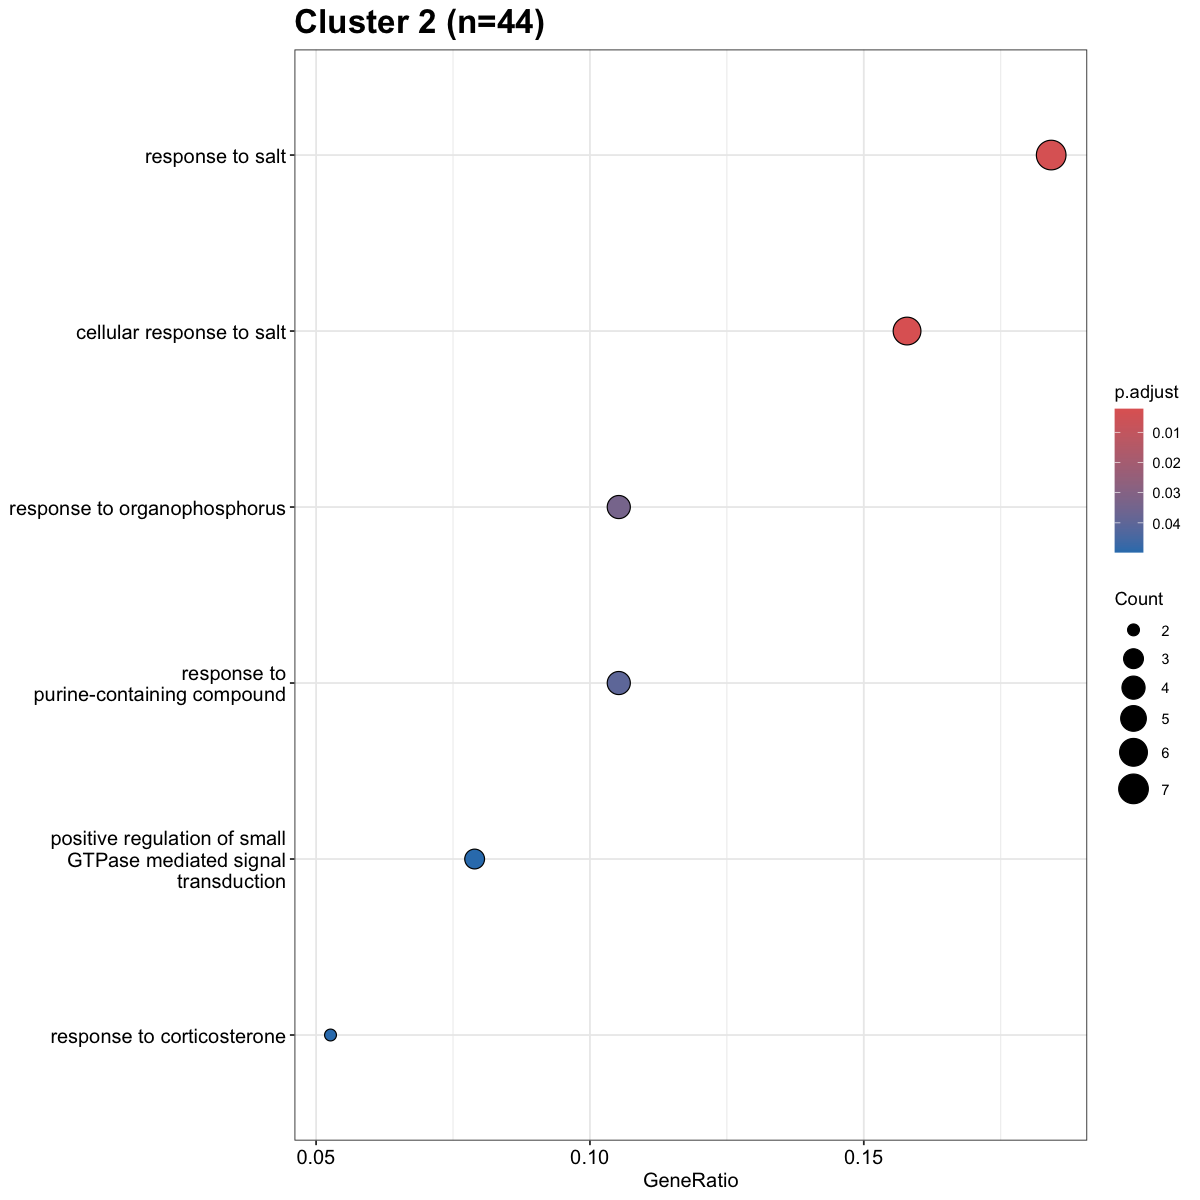

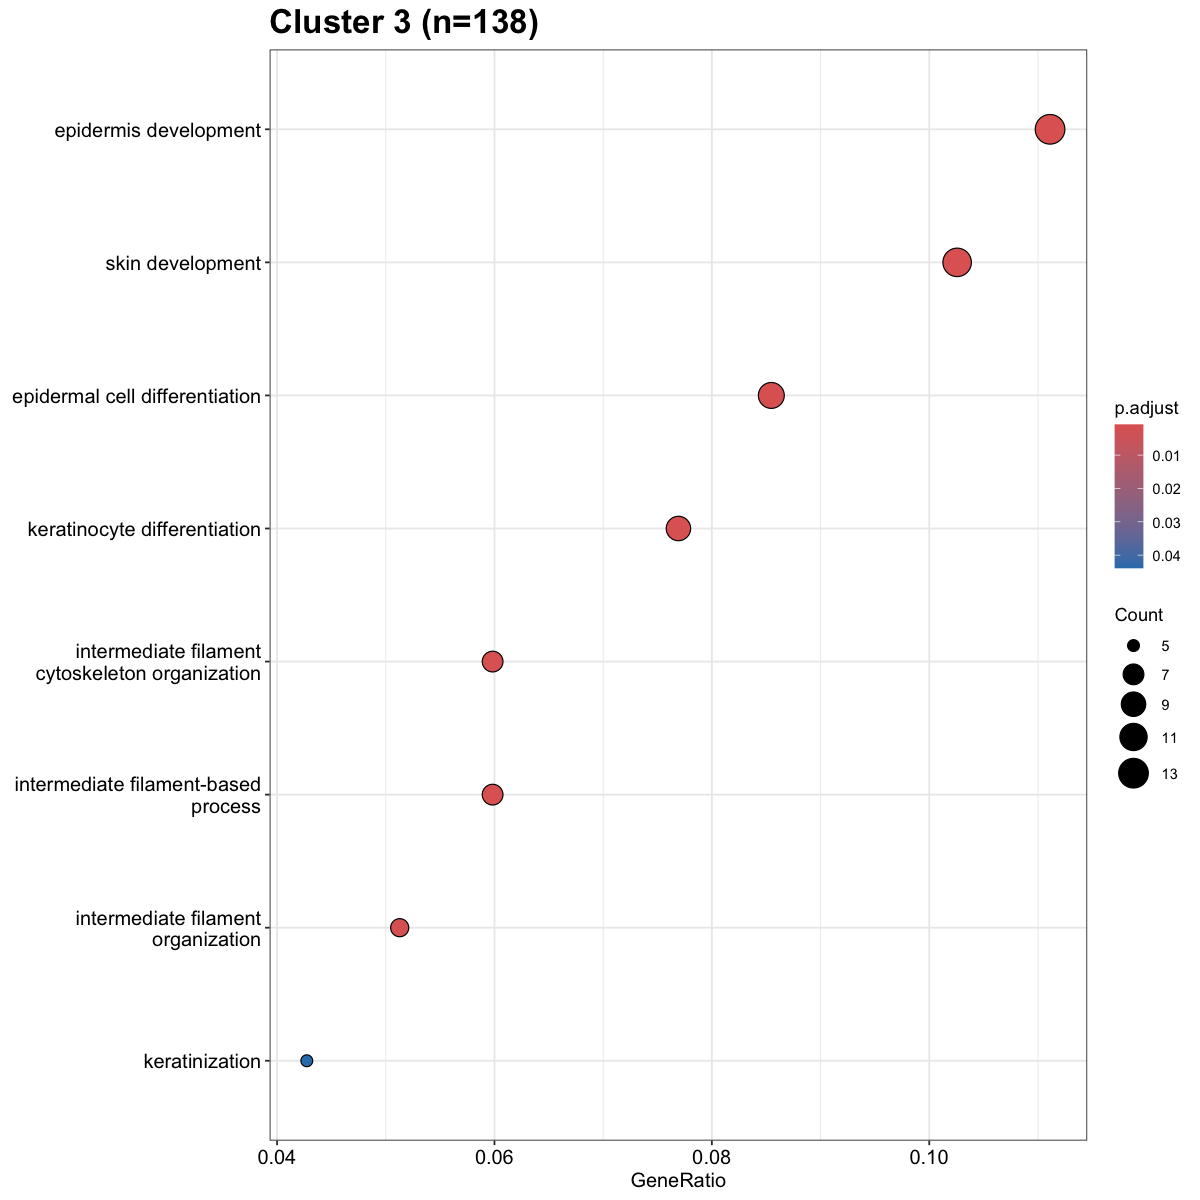

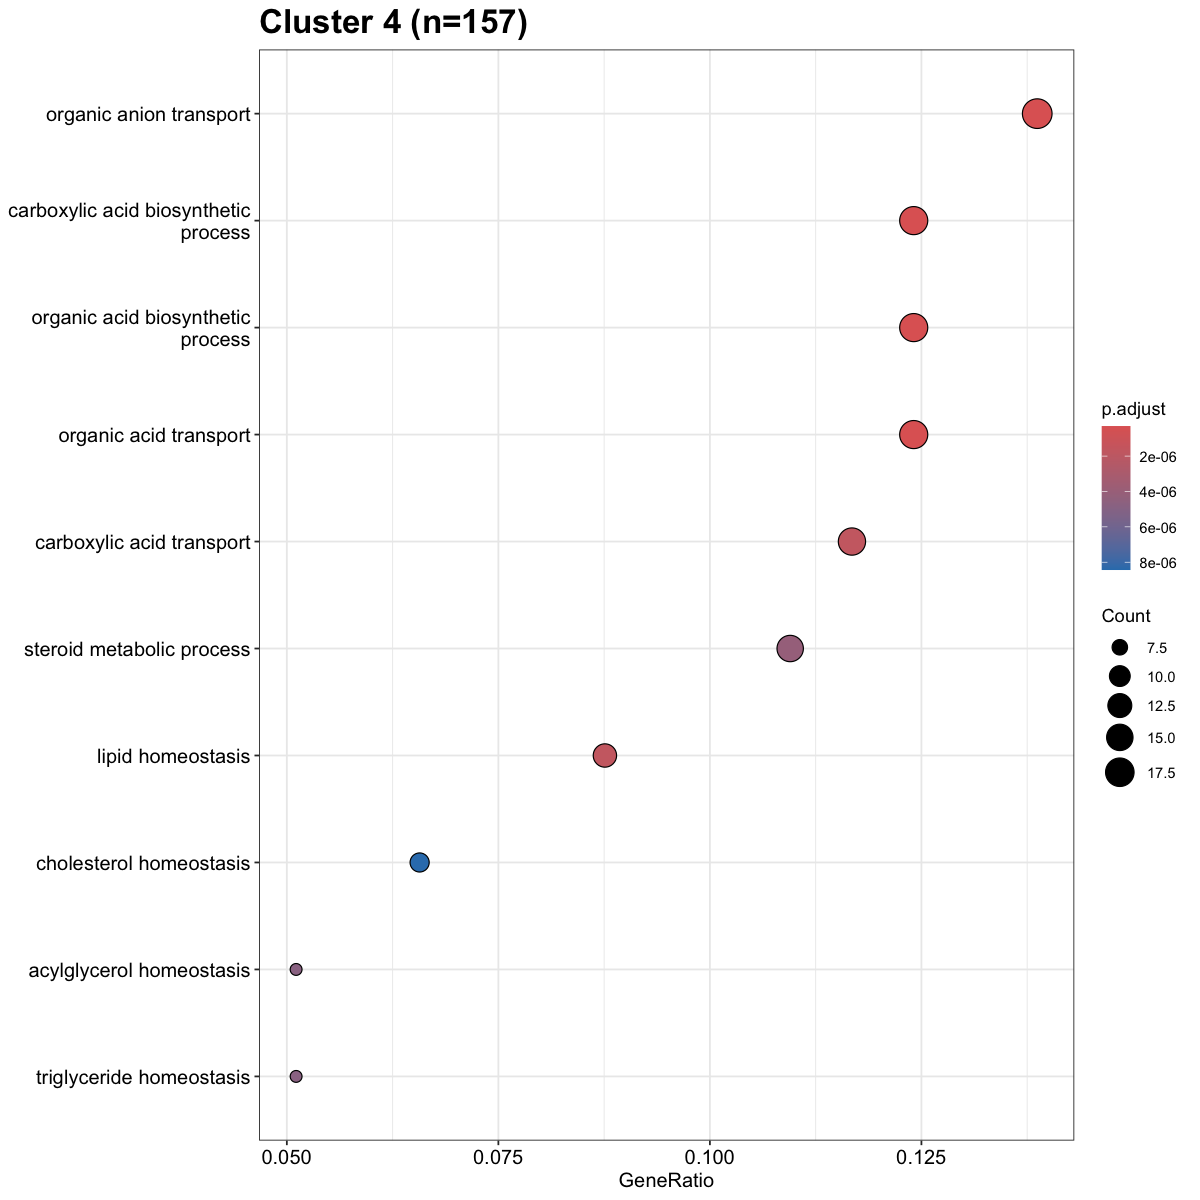

In [9]:
set.seed(1500)

options(repr.plot.width=10, repr.plot.height=10)

suppressMessages(suppressWarnings(
  for (i in 1:length(unique(clusters))) {
    cluster_i <- clusters[grepl(i, clusters)]

    entrezids <- bitr(names(cluster_i), fromType="SYMBOL",
                      toType="ENTREZID", OrgDb="org.Hs.eg.db")

    if (nrow(entrezids)>0){
      go_data <- enrichGO(gene=entrezids$ENTREZID, OrgDb=org.Hs.eg.db,
                      keyType="ENTREZID", ont="BP", pAdjustMethod="BH",
                      qvalueCutoff=0.05, readable=T)

      if (nrow(go_data) > 0) {
        go_plot <- dotplot(go_data)
        plot(go_plot +
               ggtitle(paste0("Cluster ", i, " (n=", table(clusters)[i], ")")) +
               theme(plot.title=element_text(size=20, face="bold")))
      }
    }
  }))